In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# importing the dataset and exploring the dataframe
Original_dataset = pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")
print(Original_dataset.columns, '\n')
Original_dataset.shape

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object') 



(212331, 15)

In [4]:
# exploring the dataset by identifying every unique value in the School Name column and how many times they appear in this column.
school_counts = Original_dataset['School Name'].value_counts().to_dict()
for school, count in school_counts.items():
    print(f"{school}: {count}")

New Visions Charter High School for Advanced Math: 1337
New Visions Charter High School for the Humanities: 1031
Francis Lewis High School: 490
James Madison High School: 490
Long Island City High School: 489
Edward R. Murrow High School: 489
John Dewey High School: 488
Benjamin N. Cardozo High School: 486
Forest Hills High School: 486
New Dorp High School: 485
Tottenville High School: 484
John Bowne High School: 484
John Adams High School: 484
Robert H. Goddard High School of Communication Art: 481
Curtis High School: 480
Abraham Lincoln High School: 480
Academy of Finance and Enterprise: 480
New Utrecht High School: 480
Port Richmond High School: 480
New World High School: 479
Susan E. Wagner High School: 479
Midwood High School: 477
DeWitt Clinton High School: 477
Bayside High School: 477
Jamaica Gateway to the Sciences: 476
Rachel Carson High School for Coastal Studies: 476
Fort Hamilton High School: 475
William Cullen Bryant High School: 475
Art and Design High School: 474
Hillcre

Based on the returned data, it appears that ‘New Visions Charter High School for Advanced Math’ is the school with the most entries in the ‘School Name’ column. This suggests that this school probably has the most data of any school in the dataset. As a result of this finding, I am going to use this school as my starting point.

In [5]:
# now i am going to be identifying the total number count of Null values in each column as it relates to the school which i am using as a starting point.
school_df_subset1 = Original_dataset[Original_dataset['School Name'] == 'New Visions Charter High School for Advanced Math']

null_counts_subset1 = school_df_subset1.isnull().sum()
print(null_counts_subset1, '\n')

# counting empty strings to ensure data accuracy
empty_string_counts_subset1 = (school_df_subset1 == "").sum()
print(empty_string_counts_subset1)

School DBN                     0
School Name                    0
School Level                   0
Regents Exam                   0
Year                           0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
Number Scoring CR              0
Percent Scoring CR             0
dtype: int64 

School DBN                     0
School Name                    0
School Level                   0
Regents Exam                   0
Year                           0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
Number Scoring CR              0
Percent Scoring CR          

Based on this code, I can ensure that there are no Null values/empty strings for any column in this dataset as it relates to the chosen school.

In [6]:
# using columns 'Mean Score' and 'Percent Scoring CR' as the comparison modes.
# performing data cleaning on the rest of the dataset.
# if a row in the dataset contains either a null value or empty string for either of these columns, it will be dropped.

cleaned_df = Original_dataset.replace("", np.nan) # replacing empty strings to null values using numpy
cleaned_df = cleaned_df.dropna(subset=['Mean Score', 'Percent Scoring CR'], how='any')
print(cleaned_df.shape)

(212331, 15)


a significant amount of rows were removed.
 212,331 (original rows) - 69,651 (cleaned rows) = 142,680 rows dropped.
 approximately 67.2% of rows were dropped.
 while this is a big percentage of the dataset, based on my observation, data is requiered in both of these columns to perform this analysis.

In [7]:
# Convert 'Mean Score' and 'Percent Scoring CR' to numeric
cleaned_df['Mean Score'] = pd.to_numeric(cleaned_df['Mean Score'], errors='coerce')
cleaned_df['Percent Scoring CR'] = pd.to_numeric(cleaned_df['Percent Scoring CR'], errors='coerce')

other_schools_df = cleaned_df[cleaned_df['School Name'] != 'New Visions Charter High School for Advanced Math'] # creating a subset with the rest of the schools

# calculate the 'Mean Score' and 'Percent Scoring CR' for all the schools excluding 'New Visions Charter High School for Advanced Math' by year.
mean_scores_by_year = other_schools_df.groupby('Year')['Mean Score'].mean()
percent_scoring_cr_by_year = other_schools_df.groupby('Year')['Percent Scoring CR'].mean()

# calculate the 'Mean Score' and 'Percent Scoring CR' for 'New Visions Charter High School for Advanced Math' by year.
school_df_subset2 = cleaned_df[cleaned_df['School Name'] == 'New Visions Charter High School for Advanced Math']
school_mean_scores_by_year = school_df_subset2.groupby('Year')['Mean Score'].mean()
school_percent_scoring_cr_by_year = school_df_subset2.groupby('Year')['Percent Scoring CR'].mean()

creating different subsets in order to stablish the foundation for a direct comparasion between 'New Visions Charter High School for Advanced Math' adn the rest of the dataset. now moving on to descriptive statistics.

In [8]:
print("This is for the rest of the schools in the detaframe excluding 'New Visions Charter High School for Advanced Math'")
print(mean_scores_by_year, '\n')
print(percent_scoring_cr_by_year, '\n')
print("This is for the school 'New Visions Charter High School for Advanced Math'")
print(school_mean_scores_by_year, '\n')
print(school_percent_scoring_cr_by_year, '\n')

This is for the rest of the schools in the detaframe excluding 'New Visions Charter High School for Advanced Math'
Year
2015    65.738452
2016    65.660908
2017    66.736092
Name: Mean Score, dtype: float64 

Year
2015    28.279445
2016    35.856099
2017    47.719934
Name: Percent Scoring CR, dtype: float64 

This is for the school 'New Visions Charter High School for Advanced Math'
Year
2015    62.752030
2016    63.548742
2017    63.139815
Name: Mean Score, dtype: float64 

Year
2015    16.403922
2016    31.685802
2017    40.405634
Name: Percent Scoring CR, dtype: float64 



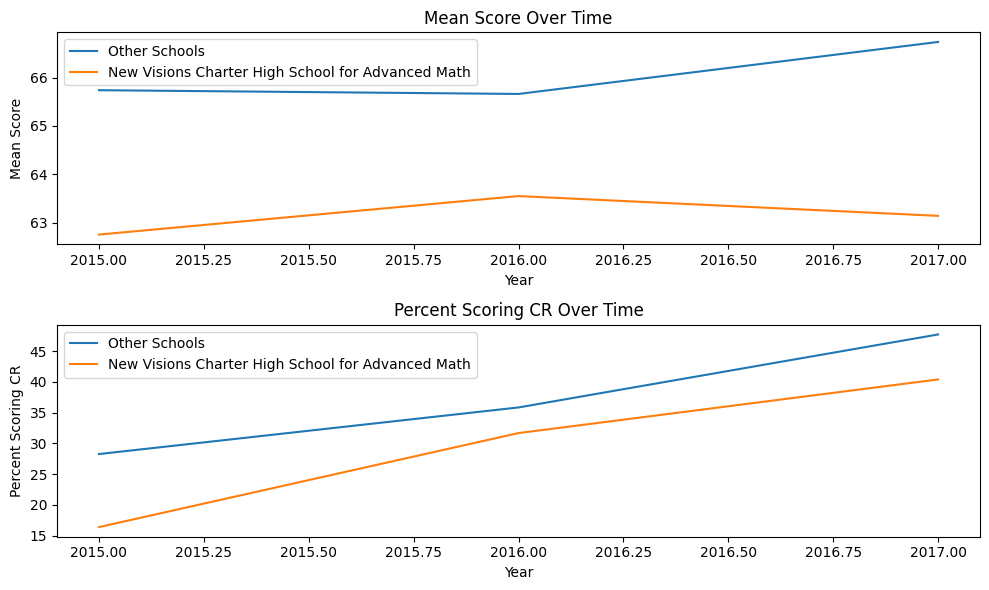

In [9]:
# Visualizing the data

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot 'Mean Score' over time
plt.subplot(2, 1, 1) #  2 rows, 1 column, first plot
plt.plot(mean_scores_by_year.index, mean_scores_by_year, label='Other Schools')
plt.plot(school_mean_scores_by_year.index, school_mean_scores_by_year, label='New Visions Charter High School for Advanced Math')
plt.title('Mean Score Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Plot 'Percent Scoring CR' over time
plt.subplot(2, 1, 2) #  2 rows, 1 column, second plot
plt.plot(percent_scoring_cr_by_year.index, percent_scoring_cr_by_year, label='Other Schools')
plt.plot(school_percent_scoring_cr_by_year.index, school_percent_scoring_cr_by_year, label='New Visions Charter High School for Advanced Math')
plt.title('Percent Scoring CR Over Time')
plt.xlabel('Year')
plt.ylabel('Percent Scoring CR')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

The visualizations provide a comparative view of the performance of ‘New Visions Charter High School for Advanced Math’ and other schools over time. The ‘Mean Score’ and ‘Percent Scoring CR’ metrics serve as indicators of academic performance. If the trend lines for ‘New Visions Charter High School for Advanced Math’ are consistently higher than those of other schools, it suggests that students from this school are, on average, scoring higher and are more college-ready than their peers in other schools. However, if the trend lines are lower or fluctuate significantly, it may indicate areas where the school could improve. Further analysis could help delve into potential causes for these trends and suggest actionable insights for improvement